# Periodic Volcanic Forcing Experiments - Figure 2

This notebook generates Figure 2, which demonstrates the impact of periodic equatorial volcanic forcing on Atlantic Meridional Overturning Circulation (AMOC) strength in a glacial climate state (230 ppm CO₂).



## Experimental Design- Long-term climate system memory and response

- Magnitude thresholds for triggering

The analysis compares a control run (no volcanic forcing) with three periodic volcanic forcing experiments:- The repeatability of volcanic-triggered transitions

This figure tests whether volcanic forcing can act as a pacemaker for millennial-scale climate oscillations similar to Dansgaard-Oeschger events. By applying forcing at regular intervals, we can assess:

**Control Run:**

- CO₂ concentration: 230 ppm (glacial levels)## Scientific Context

- No volcanic forcing applied

- Represents natural AMOC variability- Run length: ~7000+ model years

- Forcing frequency: Every 1000 years

**Volcanic Forcing Experiments:**- Volcanic forcing location: Equatorial

All experiments apply equatorial volcanic eruptions with 1000-year periodicity:- Climate state: Glacial conditions (230 ppm CO₂)

1. **High magnitude (230 Tg SO₄)**: Tests response to very large eruptions- Ocean component: POP2 (Parallel Ocean Program)

2. **Medium magnitude (115 Tg SO₄)**: Tests response to moderate eruptions  - Model: CESM1.3 (iCESM)

3. **Low magnitude (58 Tg SO₄)**: Tests response to smaller eruptions

## Model Configuration

## Key Questions Addressed

- Red vertical lines: Timing of volcanic events

1. Can periodic volcanic forcing trigger AMOC transitions in a glacial climate?- Colored line: Volcanic forcing experiment

2. How does the magnitude of volcanic forcing affect AMOC response?- Blue line: Control run (no volcanism)

3. Is there a threshold eruption size needed to induce transitions?

4. How does the climate system respond over multiple forcing cycles?

**Panel C**: AMOC response to 58 Tg eruptions (every 1000 years)

## Figure Structure**Panel B**: AMOC response to 115 Tg eruptions (every 1000 years)

**Panel A**: AMOC response to 230 Tg eruptions (every 1000 years)

In [8]:
# numpy/scipy stuff
import numpy as np
from scipy.signal import argrelextrema

# matplotlib stuff
import matplotlib.pyplot as plt
#plt.style.use('seaborn-talk')
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch
import matplotlib as mpl
import matplotlib.lines as mlines

mpl.rcParams['figure.figsize'] = (16.0, 10.0)


# data sci stuff
import xarray as xr
import pandas as pd

# system stuff
import os
import sys
import glob
import fnmatch

# netcdf stuff
from netCDF4 import Dataset
import datetime
import cftime
import nc_time_axis

# widgets stuff
import ipywidgets as widgets
from ipywidgets import interact,interactive

# dask stuff
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
from dask.diagnostics import visualize

# bokeh for dask extension
import bokeh
from bokeh.io import output_notebook
output_notebook()

from scipy.io import netcdf

#import nsim
# getting more fonts in matplotlib
# sudo apt install msttcorefonts
#
# cd /usr/share/fonts/truetype/msttcorefonts
# cp * /home/guido/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf
#
# rebuild fonts
from matplotlib import rcParams
#import matplotlib.font_manager as font_manager; font_manager._rebuild()



Loading BokehJS ...

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as feature

# try geoviews later
#import geoviews as gv
#import geoviews.feature as gf
#from bokeh.models import HoverTool
from bokeh.models import CustomJS, HoverTool
from bokeh.plotting import figure, show

# widgets stuff
import ipywidgets as widgets
from ipywidgets import interact,interactive
from ipywidgets import interact,FloatSlider,IntSlider

In [10]:
def setaxesfsize(axl,fontsize):
    ticklabelbot = axl.get_xticklabels()
    ticklabelleft = axl.get_yticklabels()
    for labelx in ticklabelbot:
        labelx.set_fontsize(fontsize)
#    i=0
    for labely in ticklabelleft:
#        if i != 0:
            labely.set_fontsize(fontsize)
#        else:
#            labely.set_visible(False)
#        i+=1
#    # remove top label on y-axis
#    labely.set_visible(False)

In [11]:
def get_amoc_max(mocarray):
    latmin=20.
    latmax=50.
    zmin=50000.
    zmax=200000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).max(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max

def get_aabw_max(mocarray):
    latmin=-80.
    latmax=0.
    zmin=300000.
    zmax=400000.
    region = 0
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))
 
    return moc_max

def get_atl_aabw_max(mocarray):
    latmin=-40.
    latmax=0.
    zmin=200000.
    zmax=400000.
    region = 1
    moc_max_em = (mocarray
               .sel(transport_reg=region, moc_comp=0, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_ei = (mocarray
               .sel(transport_reg=region, moc_comp=1, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max_sm = (mocarray
               .sel(transport_reg=region, moc_comp=2, lat_aux_grid=slice(latmin, latmax), moc_z=slice(zmin, zmax))
               .load())
    moc_max = (moc_max_em +  moc_max_ei +  moc_max_sm).min(dim=('lat_aux_grid', 'moc_z'))

    return moc_max


In [12]:
# Create the CFDatetimeCoder instance
time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
time_coder

In [13]:
#run_230i = "/cdata/climo/cesmi6gat31rblc230i/ocn/hist/ts/cesmi6gat31rblc230i_ANN_210912_998911_pop_MOC.nc"
run_230i = "/cdata/climo/cesmi6gat31rblc230i/ocn/hist/ts/cesmi6gat31rblc230i_ANN_210912_998911_pop_decclimots.nc"

xrdata_230i = xr.open_dataset(run_230i, engine='netcdf4', chunks={'time': 20}, decode_times=time_coder, decode_timedelta=True)


#run_1000p = "/cdata/climo/cesmi6gat31rblc230iv1000p/ocn/hist/ts/cesmi6gat31rblc230iv1000p_ANN_260912_998911_pop_MOC.nc"
run_1000p = "/cdata/climo/cesmi6gat31rblc230iv1000p/ocn/hist/ts/cesmi6gat31rblc230iv1000p_ANN_260912_998911_pop_decclimots.nc"
xrdata_1000p = xr.open_dataset(run_1000p, engine='netcdf4', chunks={'time': 20}, decode_times=time_coder, decode_timedelta=True)
#run_1000ph = "/cdata/climo/cesmi6gat31rblc230iv1000ph/ocn/hist/ts/cesmi6gat31rblc230iv1000ph_ANN_260912_998911_pop_MOC.nc"
run_1000ph = "/cdata/climo/cesmi6gat31rblc230iv1000ph/ocn/hist/ts/cesmi6gat31rblc230iv1000ph_ANN_260912_998911_pop_decclimots.nc"
xrdata_1000ph = xr.open_dataset(run_1000ph, engine='netcdf4', chunks={'time': 20}, decode_times=time_coder, decode_timedelta=True)
#run_1000pq = "/cdata/climo/cesmi6gat31rblc230iv1000pq/ocn/hist/ts/cesmi6gat31rblc230iv1000pq_ANN_260912_998911_pop_MOC.nc"
run_1000pq = "/cdata/climo/cesmi6gat31rblc230iv1000pq/ocn/hist/ts/cesmi6gat31rblc230iv1000pq_ANN_260912_998911_pop_decclimots.nc"
xrdata_1000pq = xr.open_dataset(run_1000pq, engine='netcdf4', chunks={'time': 20}, decode_times=time_coder, decode_timedelta=True)


In [14]:
# control
amoc_max_230i = get_amoc_max(xrdata_230i.MOC)
# volc experiments
amoc_max_1000p = get_amoc_max(xrdata_1000p.MOC)
amoc_max_1000ph = get_amoc_max(xrdata_1000ph.MOC)
amoc_max_1000pq = get_amoc_max(xrdata_1000pq.MOC)


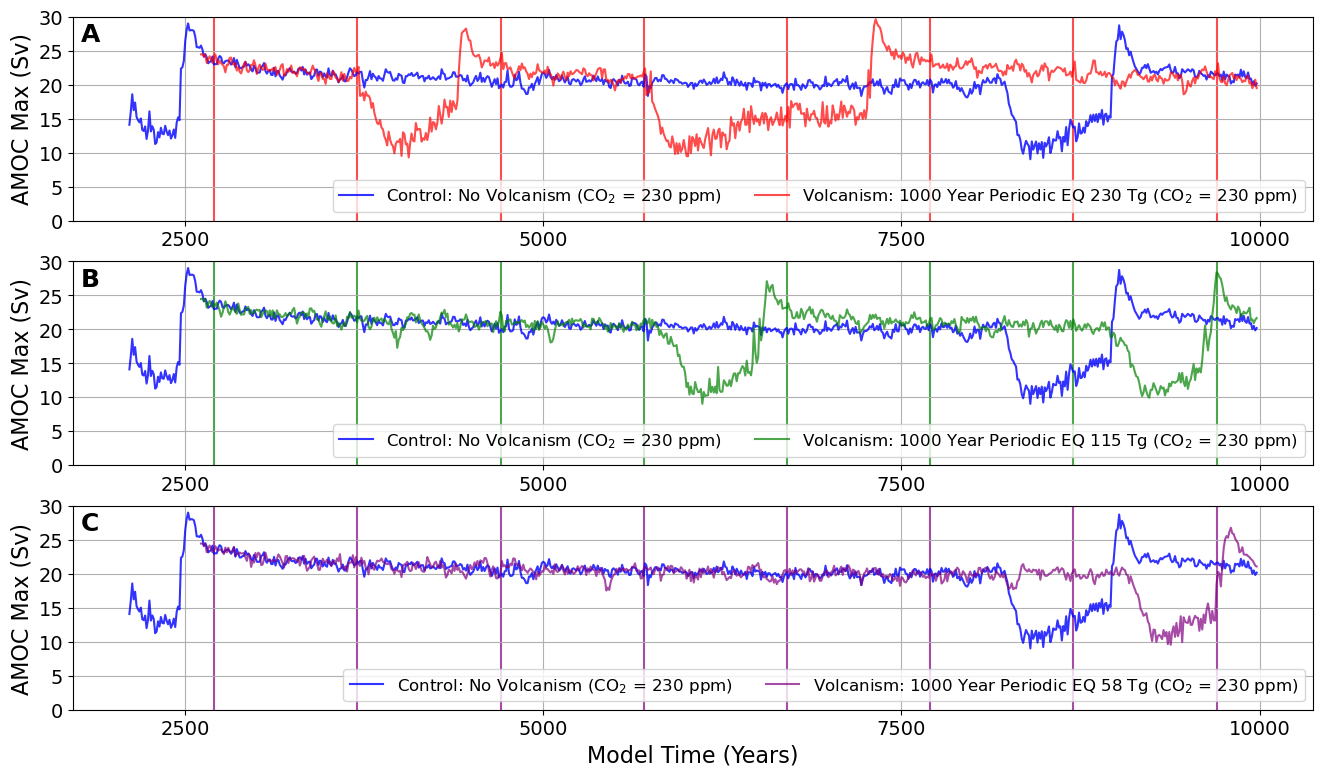

In [15]:
fig = plt.figure(figsize=(16,9))


lw=1.5
lalp=0.7

ax0=plt.subplot(311)
ax1=plt.subplot(312)
ax2=plt.subplot(313)
#ax3=plt.subplot(514)
#ax4=plt.subplot(515)
ax = [ax0, ax1, ax2]

cntcol = 'blue'
cntalp = 0.8
# volcanic run colors
vcols = ["red", "green", "purple"]
ecols = vcols
for i in range(3):
    amoc_max_230i.plot(ax=ax[i], color=cntcol, alpha=cntalp,linewidth=lw, label="Control: No Volcanism (CO$_2$ = 230 ppm)")

amoc_max_1000p.plot(ax=ax[0], color=vcols[0], alpha=lalp,linewidth=lw, label="Volcanism: 1000 Year Periodic EQ 230 Tg (CO$_2$ = 230 ppm)")
amoc_max_1000ph.plot(ax=ax[1], color=vcols[1], alpha=lalp,linewidth=lw, label="Volcanism: 1000 Year Periodic EQ 115 Tg (CO$_2$ = 230 ppm)")
amoc_max_1000pq.plot(ax=ax[2], color=vcols[2], alpha=lalp,linewidth=lw, label="Volcanism: 1000 Year Periodic EQ 58 Tg (CO$_2$ = 230 ppm)")

for i in range(3):

    ax[i].set_ylabel("AMOC Max (Sv)",size=16)
    ax[i].set_xlabel("",size=16)
    #ax[i].grid()
    ax[i].set_title("", size=16, loc='center')


ax[2].set_ylabel("AMOC Max (Sv)",size=16)
ax[2].set_xlabel("Model Time (Years)",size=16)
#ax[2].grid()
#ax[2].set_title("Volcanic Test", size=16, loc='center')
ax[2].set_title("", size=16, loc='center')

# do background volcanic lines 


v2601 = cftime.num2date(2601*365, 'days since 0000-01-01 00:00:00', calendar='noleap')
vgrid0 = [ cftime.num2date(yr*365, 'days since 0000-01-01 00:00:00', calendar='noleap') for yr in range(2701,10000,1000) ]
# These are for fading lines
vgrid1 = [ cftime.num2date((yr+20)*365, 'days since 0000-01-01 00:00:00', calendar='noleap') for yr in range(2701,10000,1000) ]
vgrid2 = [ cftime.num2date((yr+40)*365, 'days since 0000-01-01 00:00:00', calendar='noleap') for yr in range(2701,10000,1000) ]
for j in range(3):
    ax[j].set_ylim(0,30)
    setaxesfsize(ax[j],14)
    
    if j < 3:
        volcol = ecols[0]
    elif j == 3:
        volcol = ecols[1]
    else:
        volcol = ecols[2]
    
    # volcanic pulse linewidths
    vlw = 5.0
    if j == 0 or j == 3 or j == 4:
        alpfac = 1.0
    elif j == 1:
        alpfac = 0.5
    elif j == 2:
        alpfac = 0.25
        
    # try to move to back with zorder
    zo = 0
    # make thin black line at start
    [ ax[j].vlines(vgrid0[i],0,30, color=vcols[j], alpha=0.7, linewidths=1.5, zorder=1) for i in range(0,8) ]


    ax[j].legend(loc=4,fontsize=12,ncol=2)


# add a,b,c,d
lx = 0.006
ly = 0.88
ax[0].text(lx, ly, 'A',
         transform=ax[0].transAxes, size=18, weight='bold')
ax[1].text(lx, ly, 'B',
         transform=ax[1].transAxes, size=18, weight='bold')
ax[2].text(lx, ly, 'C',
         transform=ax[2].transAxes, size=18, weight='bold')

ax[0].grid()
ax[1].grid()
ax[2].grid()

# volcanic forcing at 7950
icepaperdir = "/home/guido/Dropbox/plots/volcanic/"
saveplot=False
if saveplot:
    plt.savefig(icepaperdir+"Figure2_volc_230_periodic_EQ.png", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
    plt.savefig(icepaperdir+"Figure2_volc_230_periodic_EQ.pdf", dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
